# • PROJECT OBJECTIVE:
# - We will build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively.

In [1]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

import scipy.sparse
from scipy.sparse import csr_matrix
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
from sklearn import preprocessing
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [3]:
pwd

'C:\\Users\\HARITHA\\Pictures\\Great Learning project\\Reccomendation systems\\Data Set\\Data Set'

In [4]:
os.chdir('C:\\Users\\HARITHA\\Pictures\\Great Learning project\\Reccomendation systems\\Data Set\\Data Set')

# Steps and tasks:

1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps

In [5]:
rev_1=pd.read_csv('phone_user_review_file_1.csv',encoding='latin1')
rev_2=pd.read_csv('phone_user_review_file_2.csv',encoding='latin1')
rev_3=pd.read_csv('phone_user_review_file_3.csv',encoding='latin1')
rev_4=pd.read_csv('phone_user_review_file_4.csv',encoding='latin1')
rev_5=pd.read_csv('phone_user_review_file_5.csv',encoding='latin1')
rev_6=pd.read_csv('phone_user_review_file_6.csv',encoding='latin1')

In [6]:
rev_6.shape

(163837, 11)

1.A. Merge all the provided CSVs into one dataFrame.

In [7]:
user_rev= pd.concat([rev_1,rev_2,rev_3,rev_4,rev_5,rev_6],axis=0)
user_rev.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [8]:
user_rev_copy = user_rev.copy()

1.B. Explore, understand the Data and share at least 2 observations.

In [9]:
user_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


- All columns are objects except score and score_max which are floating point.

In [10]:
user_rev.shape

(1415133, 11)

In [11]:
user_rev.describe()

,score,score_max
count,1.351644e+06,1351644.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


- Standard deviation from the mean score of 8 is 2.616121e+00

1.D. Check for missing values. Impute the missing values, if any

In [12]:
user_rev = user_rev.fillna(user_rev.median())

In [13]:
user_rev = user_rev.dropna()

1.C. Round off scores to the nearest integers

In [14]:
user_rev['score'] = user_rev['score'].astype(int) 
user_rev['score_max'] = user_rev['score_max'].astype(int) 

In [15]:
user_rev.shape

(1336416, 11)

1.E. Check for duplicate values and remove them, if any

In [16]:
user_rev = user_rev.drop_duplicates()

1.G. Drop irrelevant features. Keep features like Author, Product, and Score. 

In [17]:
user_rev.drop(['phone_url','date','lang','country','source','domain','score_max','extract'], axis = 1, inplace = True)

In [18]:
rev = user_rev.copy()

In [19]:
user_rev.shape

(1331600, 3)

1.F. Keep only 1 Million data samples. Use random state=612.

In [20]:
df = user_rev.sample(n=1000000, random_state=612)

In [21]:
df.shape

(1000000, 3)

# 2. Answer the following questions. 

2.A. Identify the most rated products.

In [22]:
df.groupby('product')['score'].mean().sort_values(ascending=False).head()  

product
Smartphone Sony Xperia E1 Desbloqueado Vivo Android 4.3 Tela 4 4GB 3G Wi-Fi CÃ¢mera 3MP - Branco                     10.0
Samsung Smartphone Samsung Galaxy S5 Desbloqueado Branco Android 4.4.2 4G CÃ¢mera 16 MP MemÃ³ria Interna 16 GB       10.0
Samsung Smartphone Samsung Galaxy S5 Duos Desbloqueado/ Dual Chip / Branco / 4G / 16 MP / Android 4.4                10.0
Samsung Smartphone Samsung Galaxy S5 Desbloqueado/ Branco / 4G / 16 MP / Android 4.4.2 / 16 GB / USB 3.0             10.0
Samsung Smartphone Samsung Galaxy S5 Desbloqueado Vivo Preto Android 4.4.2 4G CÃ¢mera 16 MP MemÃ³ria Interna 16GB    10.0
Name: score, dtype: float64

2.B. Identify the users with most number of reviews

In [23]:
(df['author'].value_counts()).head()

Amazon Customer    57765
Cliente Amazon     14564
e-bit               6309
Client d'Amazon     5720
Amazon Kunde        3624
Name: author, dtype: int64

In [24]:
df['product'].value_counts().head()

Lenovo Vibe K4 Note (White,16GB)     3908
Lenovo Vibe K4 Note (Black, 16GB)    3234
OnePlus 3 (Graphite, 64 GB)          3128
OnePlus 3 (Soft Gold, 64 GB)         2643
Huawei P8lite zwart / 16 GB          1994
Name: product, dtype: int64

2.C. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final
dataset

In [25]:
df1 = pd.DataFrame(columns=['author', 'a_count'])
df1['author']=df['author'].value_counts().index.tolist() 
df1['a_count'] = list(df['author'].value_counts() > 50)

In [26]:
index_names = df1[ df1['a_count'] == False ].index
df1.drop(index_names, inplace = True) 
df1

,author,a_count
0,Amazon Customer,True
1,Cliente Amazon,True
2,e-bit,True
3,Client d'Amazon,True
4,Amazon Kunde,True
...,...,...
674,Rohit,True
675,mircan,True
676,Rose,True
677,Dominik,True


In [27]:
df2 = pd.DataFrame(columns=['product', 'p_count'])
df2['product']=df['product'].value_counts().index.tolist() 
df2['p_count'] = list(df['product'].value_counts() > 50)

In [28]:
index_names = df2[ df2['p_count'] == False ].index 
df2.drop(index_names, inplace = True)

In [29]:
df2

,product,p_count
0,"Lenovo Vibe K4 Note (White,16GB)",True
1,"Lenovo Vibe K4 Note (Black, 16GB)",True
2,"OnePlus 3 (Graphite, 64 GB)",True
3,"OnePlus 3 (Soft Gold, 64 GB)",True
4,Huawei P8lite zwart / 16 GB,True
...,...,...
4341,Microsoft Nokia Lumia 1320 Smartphone (6 Zoll ...,True
4342,Sony Ericsson W995 Walkman,True
4343,Sim Free Apple iPhone SE 16GB Mobile Phone - R...,True
4344,SAMSUNG S5830 GALAXY ACE CEP TELEFONU,True


In [30]:
df3 = df[df['product'].isin(df2['product'])] 
df3

,score,author,product
104246,10,Paul B,Samsung i897 Captivate Android Smartphone Gala...
78693,10,Yuvraj,"Blu Win JR LTE (Grey, 4GB)"
8816,2,Joyce D. Pratt,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl..."
116623,10,David B,Samsung S3350 Chat 335 Sim Free Mobile Phone
35333,10,Sebastian,"Samsung E1190 Handy (3,6 cm (1,43 Zoll) Displa..."
...,...,...,...
87173,8,Javier,Huawei Ascend Y330 - Smartphone libre Android ...
281625,8,Patrix,"Huawei Ascend G510 Smartphone Touch, Fotocamer..."
110881,2,Amazon Customer,"Apple iPhone 5C Factory Unlocked Cellphone, 8G..."
36197,10,majere1975,"Samsung Smartphone Galaxy S Advance, Display 4..."


In [31]:
df4 = df3[df3['author'].isin(df1['author'])]
df4

,score,author,product
35333,10,Sebastian,"Samsung E1190 Handy (3,6 cm (1,43 Zoll) Displa..."
290678,8,sara,"Samsung SM-N910F Galaxy Note 4 Smartphone, 32 ..."
101404,10,ÐÐ²Ð³ÐµÐ½Ð¸Ð¹,Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼)
223332,8,Amazon Customer,Motorola Moto G 3rd Generation SIM-Free Smartp...
361379,10,e-bit,Smartphone Motorola Moto G 4 Play XT1603
...,...,...,...
21110,2,Amazon customer,Tracfone Motorola Moto E Android Prepaid Phone...
321740,8,Qantas,Sony Ericsson K810i Cyber-shot
269553,9,Capyto,Samsung M150 Cep Telefonu
87173,8,Javier,Huawei Ascend Y330 - Smartphone libre Android ...


In [32]:
df4.shape

(108983, 3)

3. Build a popularity based model and recommend top 5 mobile phones

In [33]:
ratings_mean_count = pd.DataFrame(df.groupby('product')['score'].mean()) 

In [34]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('product')['score'].count())

In [35]:
top_5=ratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False]).head()

In [36]:
top_5

,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,144
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,132
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,131
Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip CÃ¢mera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e MemÃ³ria 8GB,10.0,127
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,126


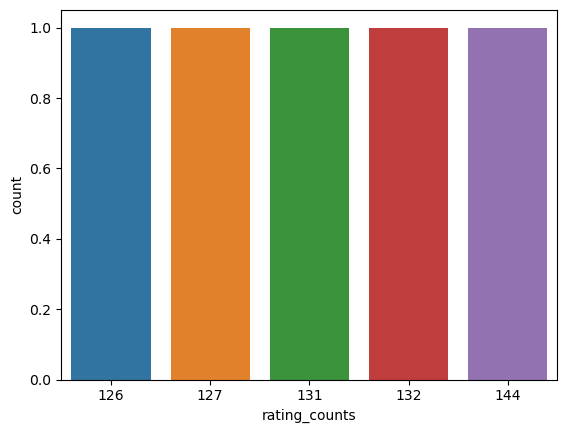

In [37]:
sns.countplot(data=top_5 , x='rating_counts')
plt.show()

In [38]:
data_pb = df
df

,score,author,product
104246,10,Paul B,Samsung i897 Captivate Android Smartphone Gala...
78693,10,Yuvraj,"Blu Win JR LTE (Grey, 4GB)"
109329,10,Pankaj Bhalla,"Lenovo P780 (Deep Black, 4GB)"
64164,6,Bgrazina,Samsung Galaxy XCover 2
8816,2,Joyce D. Pratt,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl..."
...,...,...,...
70406,4,Dudls,Nokia 301 Dual
16189,8,Cintaaa__,LG Viewty KU990
99081,10,ALBERT M. MASSILLON,BLU Dash JR K Smartphone - Unlocked - Black
102484,2,Amazon Customer,Samsung Galaxy S6 SM-G920F 32GB (FACTORY UNLOC...


4.Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you
can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You
can try both user-based and item-based model. 

In [39]:
columns_titles = ['author','product','score']
vs_rev = rev.reindex(columns=columns_titles)

In [40]:
vs_data = vs_rev.sample(n=5000, random_state=612)

In [41]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(vs_data,reader = reader)

In [42]:
data.df.head(2)

,author,product,score
104246,Paul B,Samsung i897 Captivate Android Smartphone Gala...,10
78693,Yuvraj,"Blu Win JR LTE (Grey, 4GB)",10


In [43]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [44]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x0000023725FD1580>

In [45]:
print(trainset.to_raw_uid(0))

Vova


In [46]:
print(trainset.to_raw_iid(1066))

Apple iPhone 5 16GB (Black)


In [47]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy

In [48]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

In [49]:
testset[0]

('Fabio Fanelli',
 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]',
 10.0)

In [50]:
svd_test_pred = svd_model.test(testset)

In [51]:
accuracy.rmse(svd_test_pred)

RMSE: 2.9052


2.9052204948911284

# KNNWithMeans :

In [52]:
from surprise import KNNWithMeans
from surprise import accuracy

algo_i = KNNWithMeans(k=10, sim_options={ 'user_based': False})

algo_i.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [53]:
knn_test_pred_i=algo_i.test(testset)
print(accuracy.rmse(knn_test_pred_i))

RMSE: 2.6238
2.623816860804082


In [54]:
algo_u = KNNWithMeans(k=10, sim_options={ 'user_based': True})

algo_u.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [55]:
knn_test_pred_u=algo_u.test(testset)
print(accuracy.rmse(knn_test_pred_u))

RMSE: 2.6132
2.6132396232893234


5. Evaluate the collaborative model. Print RMSE value

In [56]:
print("Item-based Model : Test Set")
knn_rmse=accuracy.rmse(knn_test_pred_i, verbose=True)

Item-based Model : Test Set
RMSE: 2.6238


In [57]:
print("User-based Model : Test Set")
knn_rmse=accuracy.rmse(knn_test_pred_u, verbose=True)

User-based Model : Test Set
RMSE: 2.6132


In [58]:
test_pred = svd_model.test(testset)

In [59]:
print("svd : Test Set")
svd_rmse=accuracy.rmse(test_pred, verbose=True)

svd : Test Set
RMSE: 2.9052


6. Predict score (average rating) for test users

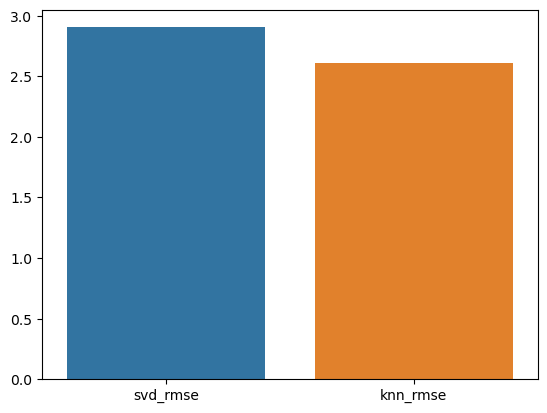

In [60]:
sns.barplot(x=['svd_rmse','knn_rmse'],y=[svd_rmse,knn_rmse]);

In [61]:
svd_pred_df=pd.DataFrame(svd_test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',svd_pred_df['est'].mean())
print('average rating  by test users: ',svd_pred_df['rui'].mean())
print('average prediction error for test users: ',(svd_pred_df['rui']-svd_pred_df['est']).abs().mean())

average prediction for test users:  7.7584196824193645
average rating  by test users:  8.0528
average prediction error for test users:  2.1765436029990526


In [62]:
knn_pred_df=pd.DataFrame(knn_test_pred_i, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',knn_pred_df['est'].mean())
print('average rating  by test users: ',knn_pred_df['rui'].mean())
print('average prediction error for test users: ',(knn_pred_df['rui']-knn_pred_df['est']).abs().mean())

average prediction for test users:  7.980752715098181
average rating  by test users:  8.0528
average prediction error for test users:  2.009750857489087


7. Report your findings and inferences

Most popular phone (rated 10 by highest number of people):
 * Overall: verykool t742
 * Amongst top users: samsung e1120       
 * Overall data is highly skewed towards 'Amazon customers' from different countries. This may also be because 'Amazon' is the biggest trader for phones in the world. Although correct 'user' names from 'Amazon' should have used.
Most of the authors have given the rating of '10' or '8'

8. Try and recommend top 5 products for test users

In [63]:
# Objective: To get top_n recommendation for each user
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [64]:
top_5 = get_top_n(knn_test_pred_i,5)
print('Top 5 recommendations for all test users are: \n')
for key,value in top_5.items(): print(key,'-> ',value,'\n')

Top 5 recommendations for all test users are: 

Fabio Fanelli ->  [('Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 7.9938666666666665)] 

mockingman ->  [('SAMSUNG X150 CEP TELEFONU', 7.9938666666666665)] 

Sreedhar Ch ->  [('Sony Ericsson Spiro', 7.9938666666666665)] 

Taylor Johnson ->  [('Samsung Galaxy S6 SM-G920F Factory Unlocked Cellphone, International Version, No Warranty 32GB, Gold', 7.9938666666666665)] 

Oks ->  [('LG KP500', 7.9938666666666665)] 

JoHn ->  [('Sony Xperia Z1 Compact D5503 Android Smartphone (Lime) International Version No Warranty', 7.9938666666666665)] 

gianfranco cavallo ->  [('Asus ZenFone 3 Max Smartphone, Memoria Interna da 32 GB, Dual-SIM, Argento [Italia]', 7.9938666666666665)] 

Alejandro G. ->  [('Huawei Nexus 6P unlocked smartphone, 32GB Silver (US Warranty)', 7.9938666666666665)] 

refo ->  [('Samsung Galaxy S3 mini (GT-I8200) Smartphon

9. Try other techniques (Example: cross validation) to get better results

In [65]:
cv = []
# Iterate over all recommender system algorithms
for recsys in [SVD(),KNNWithMeans()]:
    # Perform cross validation
    tmp = cross_validate(recsys, data, measures=['RMSE'], cv=3, verbose=False)
    cv.append((str(recsys).split(' ')[0].split('.')[-1], tmp['test_rmse'].mean()))
pd.DataFrame(cv, columns=['RecSys', 'RMSE'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,RecSys,RMSE
0,SVD,2.583472
1,KNNWithMeans,2.611928


10. In what business scenario you should use popularity based Recommendation Systems ? 

* popularity based Recommendation Systems works on the principle of popularity and or anything which is in trend.
* It is mostly used when the new user sign in , they will able to choose the most popular things 
  - Examples : 
    - Most popular movie in movie app/website
    - Most popular songs in music app/website
    - Most popular  trendy dresses in clothing app/website

11. In what business scenario you should use CF based Recommendation Systems ?

* Collaborative filtering is classified into two types:
    - User-based: it recommends items based on the ratings given to that item by the other users who have similar taste with that of the target user.
    - Item-based : it recommends items by identifying similar patterns between items calculated using the rating users have given to items. 
            - Examples: 
                 - If you purchase mobile from online shopping app it recommends you the phone cover along with phone cover
                 - If you watch a movie in movie app then it suggest you the movie which is liked by the person who have
                   similar taste like you. 

12. What other possible methods can you think of which can further improve the recommendation for different users ?

- Other than Popularity and Collaborative Filtering, hybrid recommendation methods like
Content+Collaborative method, Demographic, Utility based,Knowledge based and memory based recommendation system can also be used.